In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [71]:
path = '.D:/GitHub/Garbage_Classification/Garbage-Classification Dataset.zip'
name = 'D:/GitHub/Garbage_Classification Dataset'



📚 IMAGE LIBRARY SUMMARY
Root Directory: C:\Users\ITG\Downloads
Total Folders (Classes): 10

📁 battery  -->  944 images
📁 biological  -->  997 images
📁 cardboard  -->  1852 images
📁 clothes  -->  5327 images
📁 glass  -->  3198 images
📁 metal  -->  1076 images
📁 paper  -->  1787 images
📁 plastic  -->  2095 images
📁 shoes  -->  1977 images
📁 trash  -->  959 images

Returned Summary Dictionary:

{'battery': 944, 'biological': 997, 'cardboard': 1852, 'clothes': 5327, 'glass': 3198, 'metal': 1076, 'paper': 1787, 'plastic': 2095, 'shoes': 1977, 'trash': 959}


C:\Users\ITG\AppData\Local\Temp\ipykernel_17552\2368952094.py:65: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


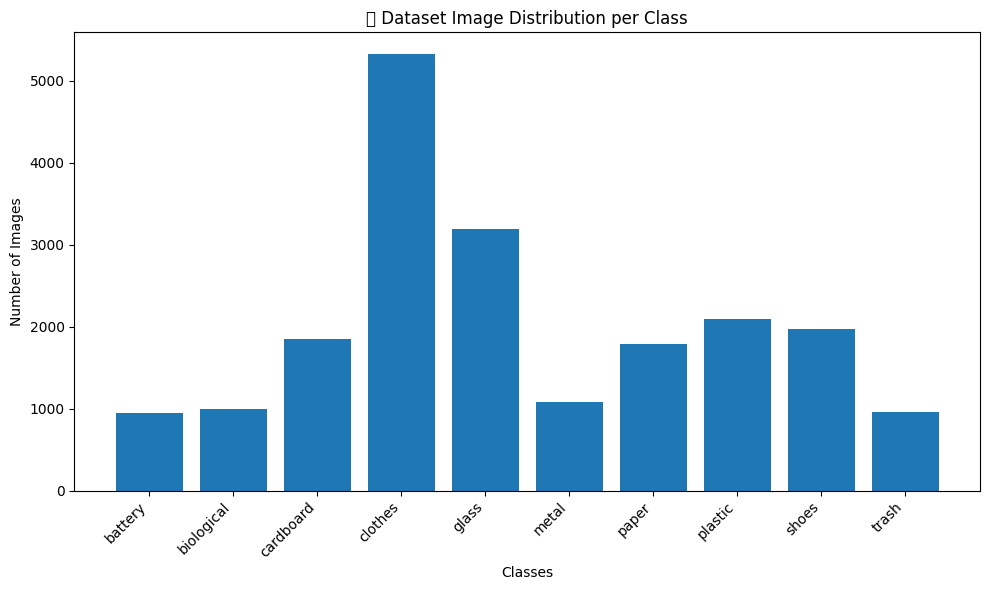

In [ ]:
def summarize_image_library(root_path):
    

    folders = [f for f in os.listdir(root_path) 
               if os.path.isdir(os.path.join(root_path, f))]
    
    print("📚 IMAGE LIBRARY SUMMARY")
    print(f"Root Directory: {root_path}")
    print(f"Total Folders (Classes): {len(folders)}\n")

    library_summary = {}

    for folder in folders:
        folder_path = os.path.join(root_path, folder)

        # Count image files by image extensions
        images = [
            f for f in os.listdir(folder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.bmp'))
        ]

        image_count = len(images)
        library_summary[folder] = image_count

        print(f"📁 {folder}  -->  {image_count} images")

    return library_summary


# ✅ CALL THE FUNCTION HERE
root_dir = r"C:\Users\ITG\Downloads"
library_summary = summarize_image_library(root_dir)

# 👇 Now this works because it's assigned!
print("\nReturned Summary Dictionary:\n")
print(library_summary)











# 📊 Plot the dataset distribution
classes = list(library_summary.keys())
counts = list(library_summary.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.xticks(rotation=45, ha='right')
plt.title("📊 Dataset Image Distribution per Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()



The data needs to be balanced, so we are going to balance it as follows.

📚 IMAGE LIBRARY SUMMARY
Root Directory: D:\GitHub\Garbage_Classification\dataset
Total Folders (Classes): 10

📁 battery  -->  4472 images
📁 biological  -->  4469 images
📁 cardboard  -->  4824 images
📁 clothes  -->  5327 images
📁 glass  -->  5108 images
📁 metal  -->  4555 images
📁 paper  -->  4738 images
📁 plastic  -->  4857 images
📁 shoes  -->  4821 images
📁 trash  -->  4510 images

📊 DATASET STATS
Total Images: 47681
Average Images per Class: 4768.10

Returned Summary Dictionary:

{'battery': 4472, 'biological': 4469, 'cardboard': 4824, 'clothes': 5327, 'glass': 5108, 'metal': 4555, 'paper': 4738, 'plastic': 4857, 'shoes': 4821, 'trash': 4510}


C:\Users\ITG\AppData\Local\Temp\ipykernel_17552\3243528484.py:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


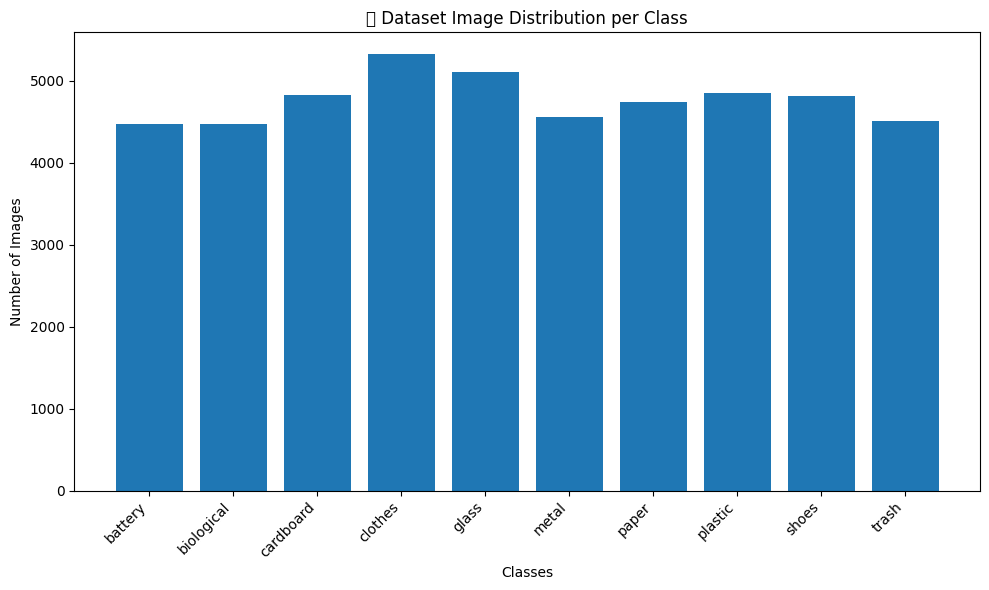

In [ ]:
import os

def summarize_image_library(root_path, min_images_threshold=0):
    """
    Scans the root directory, counts subfolders and image files,
    and displays a clean library-style summary, including dataset balance.
    """

    # Get all subfolders (classes)
    folders = [f for f in os.listdir(root_path) 
               if os.path.isdir(os.path.join(root_path, f))]
    
    print("📚 IMAGE LIBRARY SUMMARY")
    print(f"Root Directory: {root_path}")
    print(f"Total Folders (Classes): {len(folders)}\n")

    library_summary = {}
    total_images = 0

    for folder in folders:
        folder_path = os.path.join(root_path, folder)

        # Count image files by common image extensions
        images = [
            f for f in os.listdir(folder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.bmp'))
        ]

        image_count = len(images)
        library_summary[folder] = image_count
        total_images += image_count

        # Highlight classes with fewer than threshold images
        warning = " ⚠️ UNDERREPRESENTED" if image_count < min_images_threshold else ""
        print(f"📁 {folder}  -->  {image_count} images{warning}")

    average_images = total_images / len(folders) if folders else 0

    print("\n📊 DATASET STATS")
    print(f"Total Images: {total_images}")
    print(f"Average Images per Class: {average_images:.2f}")

    return library_summary

# ✅ CALL THE FUNCTION HERE
root_dir = r"D:\GitHub\Garbage_Classification\dataset"
library_summary = summarize_image_library(root_dir, min_images_threshold=100)

print("\nReturned Summary Dictionary:\n")
print(library_summary)





# 📊 Plot the dataset distribution
classes = list(library_summary.keys())
counts = list(library_summary.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts)
plt.xticks(rotation=45, ha='right')
plt.title("📊 Dataset Image Distribution per Class")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()



In [77]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path to your dataset with class folders
data_dir = r"D:\GitHub\Garbage_Classification\dataset"

# Train/Val/Test Split Ratio
train_ratio = 0.7
val_ratio   = 0.15
test_ratio  = 0.15

# Make new folders
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(data_dir, split), exist_ok=True)

# Loop through class folders and split images
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    
    train_imgs, temp_imgs = train_test_split(images, test_size=(1-train_ratio), random_state=42)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=test_ratio/(test_ratio+val_ratio), random_state=42)

    # Create class subfolders in train/val/test
    for split in ["train", "val", "test"]:
        os.makedirs(os.path.join(data_dir, split, class_name), exist_ok=True)

    # Move files
    for img in train_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(data_dir, "train", class_name, img))

    for img in val_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(data_dir, "val", class_name, img))

    for img in test_imgs:
        shutil.move(os.path.join(class_path, img), os.path.join(data_dir, "test", class_name, img))

print("✅ DONE! Dataset successfully split into Train / Val / Test.")


✅ DONE! Dataset successfully split into Train / Val / Test.
